In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
ls

Untitled.ipynb                    takehome_user_engagement.csv
relax_data_science_challenge.pdf  takehome_users.csv


In [17]:
df = pd.read_csv('takehome_users.csv' , encoding = 'ISO-8859-1')
useage = pd.read_csv('takehome_user_engagement.csv' , encoding = 'ISO-8859-1' , )

In [6]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [7]:
df.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [95]:
df['creation_time'] = pd.to_datetime(df['creation_time'])

In [18]:
useage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [10]:
useage.isnull().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [11]:
useage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [22]:
useage['time_stamp'] = pd.to_datetime(useage['time_stamp'])
useage.set_index('time_stamp' , inplace= True)

In [23]:
useage.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207917 entries, 2014-04-22 03:53:30 to 2014-01-26 08:57:12
Data columns (total 2 columns):
user_id    207917 non-null int64
visited    207917 non-null int64
dtypes: int64(2)
memory usage: 4.8 MB


In [42]:
test = useage.groupby('user_id').resample('7d').sum()

In [43]:
test.visited.unique()

array([1, 0, 3, 2, 4, 5, 6, 7])

In [68]:
test.head()

user_id  visited
user_id time_stamp                           
1       2014-04-22 03:53:30        1        1
2       2013-11-15 03:45:04        2        1
        2013-11-22 03:45:04        0        0
        2013-11-29 03:45:04        2        1
        2013-12-06 03:45:04        2        1

In [73]:
adopted_user = test[test.visited > 3]

In [78]:
adopted_user['object_id'] = adopted_user['user_id'] / adopted_user['visited']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [80]:
adopted_user['object_id'] = adopted_user['object_id'].astype(int)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [82]:
del adopted_user['user_id']

In [91]:
len(adopted_user['object_id'].unique())

1188

In [85]:
df['adopted_user'] = df['object_id'].apply(lambda x : 1 if x in adopted_user['object_id'] else 0)

In [86]:
df['adopted_user'].value_counts()

0    10812
1     1188
Name: adopted_user, dtype: int64

In [101]:
df.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
adopted_user                     0
dtype: int64

In [100]:
df[df['invited_by_user_id'].isnull()]['creation_source'].value_counts()

PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [105]:
df[~(df['invited_by_user_id'].isnull())]['creation_source'].value_counts()

ORG_INVITE      4254
GUEST_INVITE    2163
Name: creation_source, dtype: int64

In [102]:
df['last_session_creation_time'] = pd.to_datetime(df['last_session_creation_time'])

In [104]:
df.head(2)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,0


There are two features in our dataset and I decided to remove them from our training set. 

"last_session_creation_time" is unix timestamp of last login. Originally was restored as float and after converting its data type to datetime, it represented bogus values. 

As for "invited_by_user_id", there can't be any values for two categories of "SIGNUP" and "SIGNUP_GOOGLE_AUTH". That's around 29% of oour data. 

In [128]:
df['creation_source'].value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


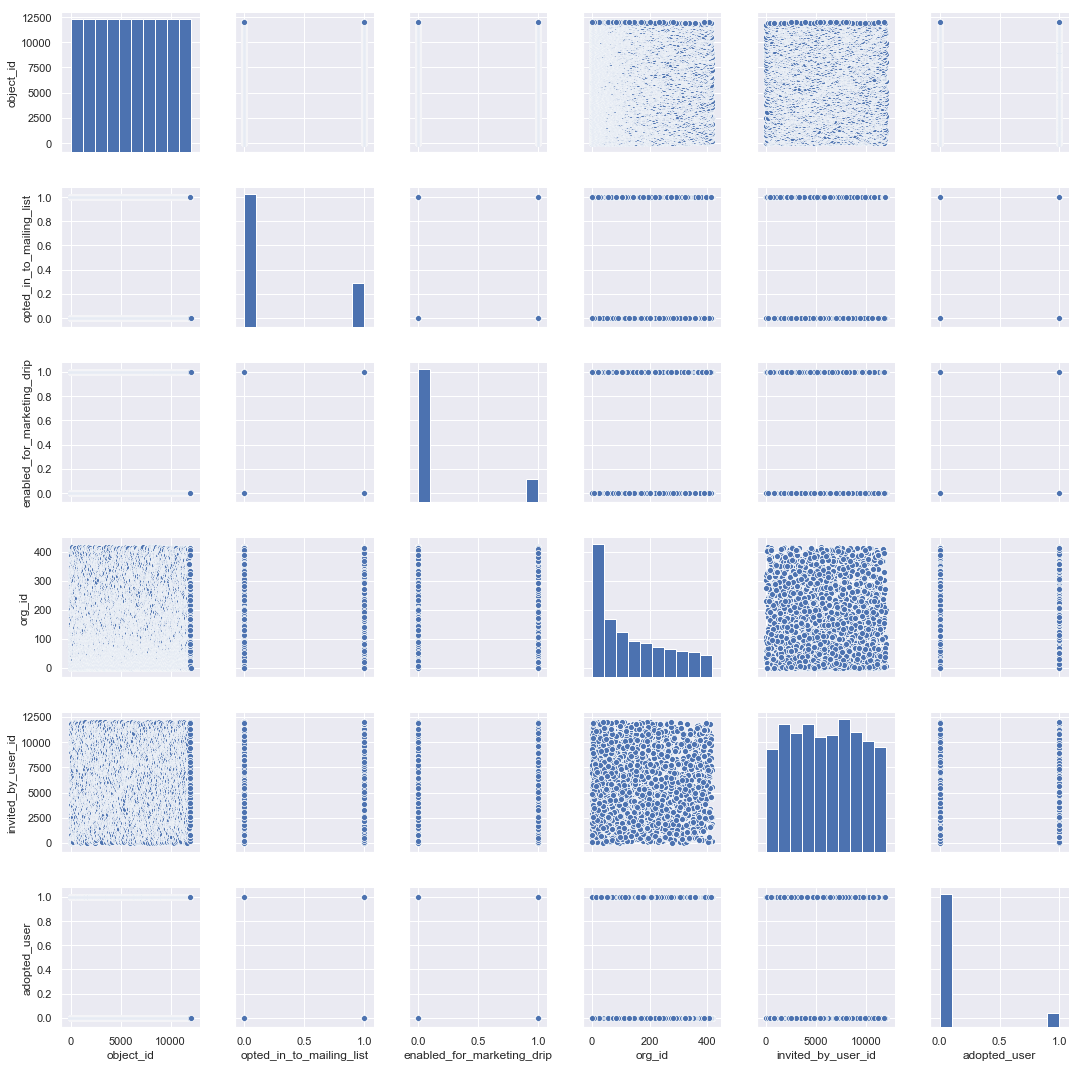

In [174]:
sns.pairplot(df)

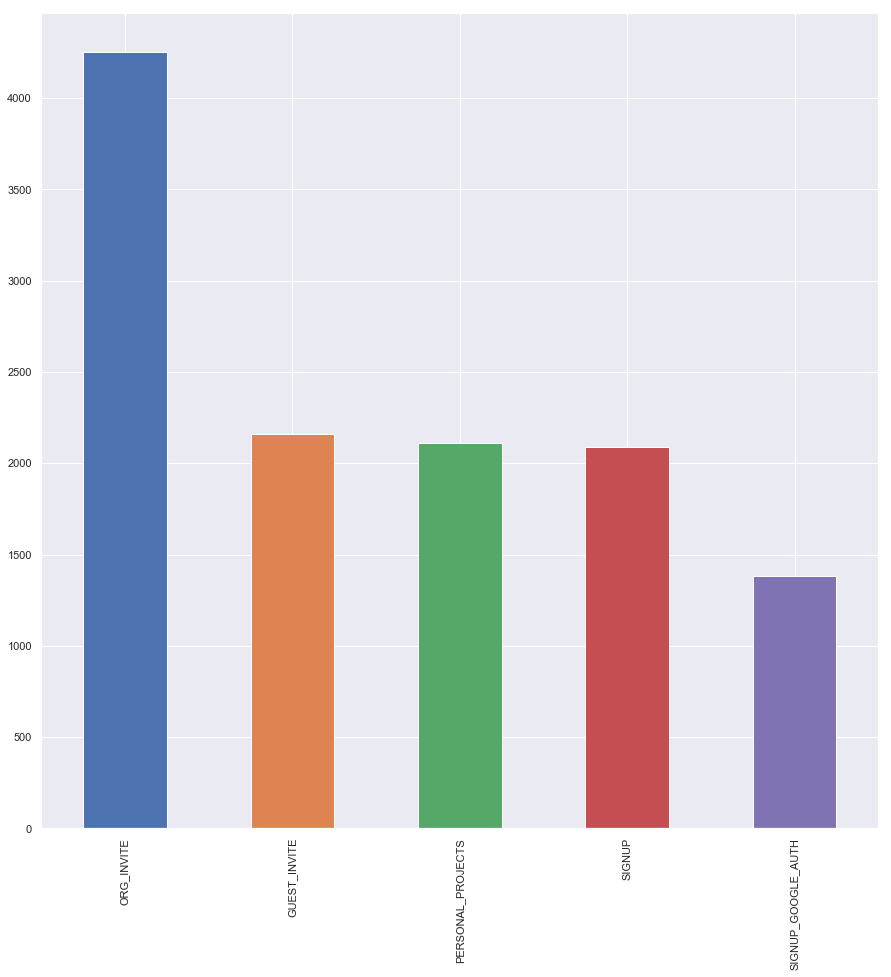

In [180]:
df['creation_source'].value_counts().plot(kind = 'bar')

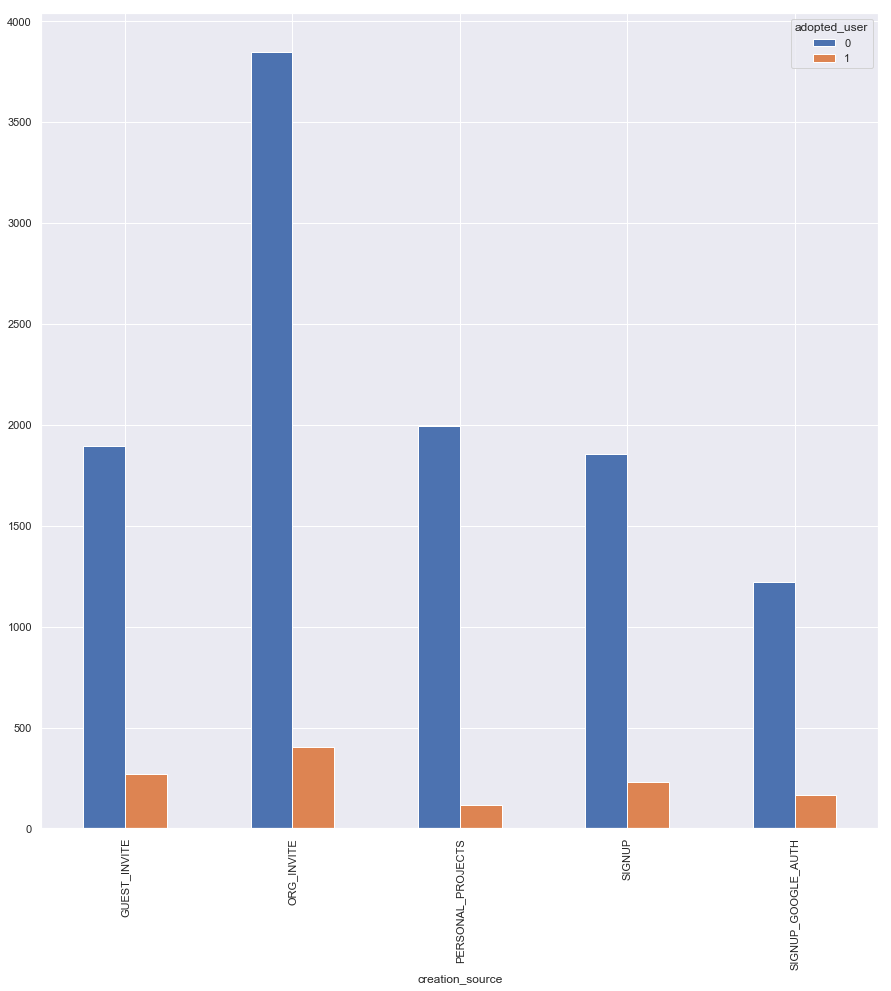

In [184]:
_ = df.groupby(['adopted_user' , 'creation_source'])['adopted_user'].count().unstack().T.plot(kind = 'bar')

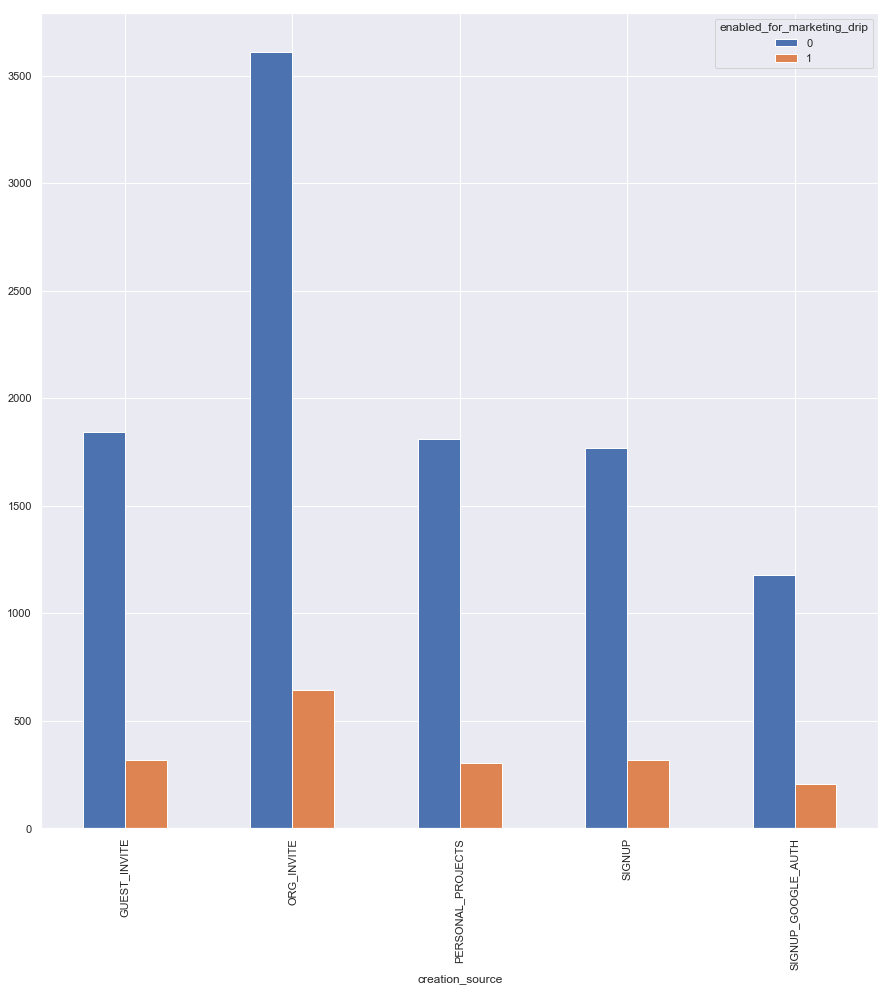

In [202]:

df.groupby(['creation_source','enabled_for_marketing_drip'])['creation_source'].count().unstack().plot(kind = 'bar')

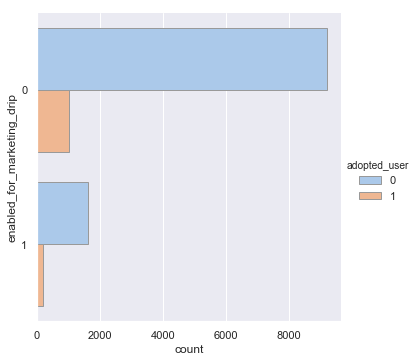

In [172]:
_ = sns.catplot(y='enabled_for_marketing_drip', hue='adopted_user', kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

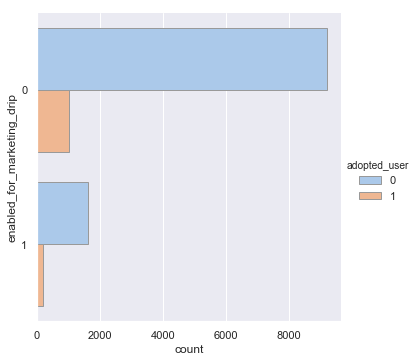

In [169]:
sns.catplot(y="enabled_for_marketing_drip", hue="adopted_user", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

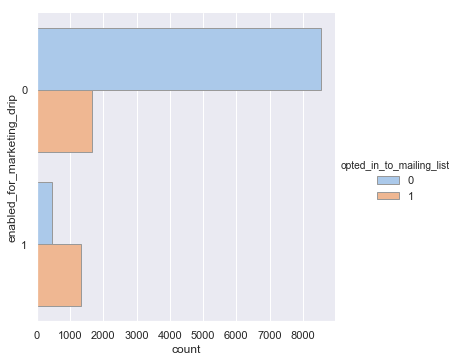

In [170]:
sns.catplot(y="enabled_for_marketing_drip", hue="opted_in_to_mailing_list", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

In [211]:
corr = df.corr()
corr

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
object_id,1.000000,-0.032370,-0.022040,0.004110,0.018699,0.000961
opted_in_to_mailing_list,-0.032370,1.000000,0.483529,0.003432,0.004699,0.015214
enabled_for_marketing_drip,-0.022040,0.483529,1.000000,0.009275,0.003687,0.003595
org_id,0.004110,0.003432,0.009275,1.000000,-0.057780,0.052147
invited_by_user_id,0.018699,0.004699,0.003687,-0.057780,1.000000,-0.003429
adopted_user,0.000961,0.015214,0.003595,0.052147,-0.003429,1.000000


In [210]:
(abs(corr.values) >= 0.5) & (abs(corr.values)  < 1)

array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]])

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
adopted_user                  12000 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(5), object(3)
memory usage: 1.0+ MB


In [218]:
categorical = ['creation_source' , 'opted_in_to_mailing_list' , 'enabled_for_marketing_drip' ]

df_dummy = pd.get_dummies(df, columns=categorical)

In [219]:
df_dummy

,object_id,creation_time,name,email,last_session_creation_time,org_id,invited_by_user_id,adopted_user,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,opted_in_to_mailing_list_0,opted_in_to_mailing_list_1,enabled_for_marketing_drip_0,enabled_for_marketing_drip_1
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,1970-01-01 00:00:01.398138810,11,10803.0,0,1,0,0,0,0,0,1,1,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1970-01-01 00:00:01.396237504,1,316.0,0,0,1,0,0,0,1,0,1,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1970-01-01 00:00:01.363734892,94,1525.0,0,0,1,0,0,0,1,0,1,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,1970-01-01 00:00:01.369210168,1,5151.0,0,1,0,0,0,0,1,0,1,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,1970-01-01 00:00:01.358849660,193,5240.0,0,1,0,0,0,0,1,0,1,0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,1970-01-01 00:00:01.387424226,197,11241.0,0,1,0,0,0,0,1,0,1,0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,1970-01-01 00:00:01.356009872,37,NaN,0,0,0,0,1,0,1,0,0,1
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,NaT,74,NaN,0,0,0,1,0,0,0,1,0,1
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,NaT,302,NaN,0,0,0,1,0,0,1,0,1,0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,1970-01-01 00:00:01.401833283,318,4143.0,1,0,1,0,0,0,0,1,0,1


In [222]:
df_dummy.drop(['opted_in_to_mailing_list_0' , 'enabled_for_marketing_drip_0' , 'creation_source_GUEST_INVITE'], 
       axis = 1 , inplace= True)

In [224]:
df_dummy.head()

,object_id,creation_time,name,email,last_session_creation_time,org_id,invited_by_user_id,adopted_user,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,opted_in_to_mailing_list_1,enabled_for_marketing_drip_1
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,1970-01-01 00:00:01.398138810,11,10803.0,0,0,0,0,0,1,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1970-01-01 00:00:01.396237504,1,316.0,0,1,0,0,0,0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1970-01-01 00:00:01.363734892,94,1525.0,0,1,0,0,0,0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,1970-01-01 00:00:01.369210168,1,5151.0,0,0,0,0,0,0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,1970-01-01 00:00:01.358849660,193,5240.0,0,0,0,0,0,0,0


In [225]:
df_dummy.columns

Index(['object_id', 'creation_time', 'name', 'email',
       'last_session_creation_time', 'org_id', 'invited_by_user_id',
       'adopted_user', 'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH', 'opted_in_to_mailing_list_1',
       'enabled_for_marketing_drip_1'],
      dtype='object')

In [226]:
X = df_dummy[['object_id' , 'org_id' , 'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH', 'opted_in_to_mailing_list_1',
       'enabled_for_marketing_drip_1']].values
y = df_dummy['adopted_user'].values

In [228]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

# Null Accuracy

In [237]:
pd.value_counts(y_test).head(1)/y_test.shape

0    0.901515
dtype: float64

In [231]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier().fit(X_train , y_train)

pred = rfc.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [232]:
from sklearn import metrics

print (metrics.accuracy_score(y_test , pred))

print (metrics.confusion_matrix(y_test , pred))

0.8843434343434343
[[3495   75]
 [ 383    7]]


In [238]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB().fit(X_train , y_train)

pred = nb.predict(X_test)

print (metrics.accuracy_score(y_test , pred))

print (metrics.confusion_matrix(y_test , pred))

0.5755050505050505
[[2091 1479]
 [ 202  188]]


In [239]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train , y_train)

pred = lr.predict(X_test)

print (metrics.accuracy_score(y_test , pred))

print (metrics.confusion_matrix(y_test , pred))

0.9015151515151515
[[3570    0]
 [ 390    0]]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [244]:
param_grid = {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']
}

In [248]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(lr , param_grid , cv = 5 , scoring= 'accuracy' )

In [249]:
grid.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([1.00000e-04, 2.63665e-04, 6.95193e-04, 1.83298e-03, 4.83293e-03,
       1.27427e-02, 3.35982e-02, 8.85867e-02, 2.33572e-01, 6.15848e-01,
       1.62378e+00, 4.28133e+00, 1.12884e+01, 2.97635e+01, 7.84760e+01,
       2.06914e+02, 5.45559e+02, 1.43845e+03, 3.79269e+03, 1.00000e+04]), 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [250]:
grid.best_score_

0.901

In [306]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=150, loss = 'exponential' ).fit(X_train, y_train)

pred = gb.predict(X_test)

print (metrics.accuracy_score(y_test , pred))

print (metrics.confusion_matrix(y_test , pred))

0.9015151515151515
[[3570    0]
 [ 390    0]]


In [314]:
df_dummy['month'] = df_dummy.creation_time.dt.month_name()
df_dummy['year'] = df_dummy.creation_time.dt.year.astype('str')
df_dummy['day'] = df_dummy.creation_time.dt.day

In [319]:
df_dummy = pd.get_dummies(df_dummy , columns=['month' , 'year'] )

In [321]:
df_dummy.drop(['year_2012' , 'month_September'] , axis = 1 , inplace= True)

In [322]:
df_dummy.columns

Index(['object_id', 'creation_time', 'name', 'email',
       'last_session_creation_time', 'org_id', 'invited_by_user_id',
       'adopted_user', 'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH', 'opted_in_to_mailing_list_1',
       'enabled_for_marketing_drip_1', 'day', 'month_April', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'year_2013', 'year_2014'],
      dtype='object')

In [375]:
X = df_dummy[['object_id', 
         'org_id', 
       'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH', 'opted_in_to_mailing_list_1',
       'enabled_for_marketing_drip_1', 'day', 'month_April', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'year_2013', 'year_2014']].values

y = df_dummy['adopted_user'].values

In [376]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)

In [343]:
pd.value_counts(y_test).head(1)/y_test.shape

0    0.901667
dtype: float64

In [331]:
gb = GradientBoostingClassifier().fit(X_train, y_train)

pred = gb.predict(X_test)

print (metrics.accuracy_score(y_test , pred))

print (metrics.confusion_matrix(y_test , pred))

0.9013333333333333
[[2704    1]
 [ 295    0]]


In [332]:
lr = LogisticRegression().fit(X_train , y_train)

pred = lr.predict(X_test)

print (metrics.accuracy_score(y_test , pred))

print (metrics.confusion_matrix(y_test , pred))

0.9016666666666666
[[2705    0]
 [ 295    0]]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [333]:
rfc = RandomForestClassifier().fit(X_train , y_train)

pred = rfc.predict(X_test)

print (metrics.accuracy_score(y_test , pred))

print (metrics.confusion_matrix(y_test , pred))

0.8973333333333333
[[2688   17]
 [ 291    4]]


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [335]:
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [337]:
from sklearn.model_selection import RandomizedSearchCV


random = RandomizedSearchCV(rfc , param_grid , n_iter = 3 , cv = 3)

In [338]:
random.fit(X, y)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=3, n_jobs=None,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [339]:
random.best_score_

0.7296666666666667

In [344]:
from sklearn.svm import SVC

svm = SVC().fit(X_train , y_train)

pred = rfc.predict(X_test)

print (metrics.accuracy_score(y_test , pred))

print (metrics.confusion_matrix(y_test , pred))

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8973333333333333
[[2688   17]
 [ 291    4]]


In [348]:
from numpy import loadtxt
from xgboost import XGBClassifier

In [349]:
xgb = XGBClassifier().fit(X_train , y_train)

pred = xgb.predict(X_test)

print (metrics.accuracy_score(y_test , pred))

print (metrics.confusion_matrix(y_test , pred))

0.9016666666666666
[[2705    0]
 [ 295    0]]


In [356]:
X = df_dummy[['object_id', 
         'org_id', 
       'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH', 'opted_in_to_mailing_list_1',
       'enabled_for_marketing_drip_1', 'day', 'month_April', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'year_2013', 'year_2014']].values

y = df_dummy['adopted_user'].values

In [357]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)

In [358]:
xgb = XGBClassifier().fit(X_train , y_train)

pred = xgb.predict(X_test)

print (metrics.accuracy_score(y_test , pred))

print (metrics.confusion_matrix(y_test , pred))

0.9016666666666666
[[2705    0]
 [ 295    0]]


In [373]:
from sklearn.decomposition import PCA

In [374]:
pca = PCA(0.95)

In [377]:
pca_X_train = pca.fit_transform(X_train)
pca_X_test = pca.transform(X_test)

In [378]:
lr.fit(pca_X_train , y_train)
pred = lr.predict(pca_X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [379]:
print (metrics.accuracy_score(y_test , pred))

print (metrics.confusion_matrix(y_test , pred))

0.9016666666666666
[[2705    0]
 [ 295    0]]


In [380]:
svm.fit(pca_X_train , y_train)
pred = svm.predict(pca_X_test)

print (metrics.accuracy_score(y_test , pred))

print (metrics.confusion_matrix(y_test , pred))

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9016666666666666
[[2705    0]
 [ 295    0]]


In [382]:
gb.fit(pca_X_train , y_train)
pred = gb.predict(pca_X_test)

print (metrics.accuracy_score(y_test , pred))

print (metrics.confusion_matrix(y_test , pred))

0.9003333333333333
[[2700    5]
 [ 294    1]]


In [383]:
xgb.fit(pca_X_train , y_train)
pred = xgb.predict(pca_X_test)

print (metrics.accuracy_score(y_test , pred))

print (metrics.confusion_matrix(y_test , pred))

0.9016666666666666
[[2705    0]
 [ 295    0]]


In [384]:
rfc.fit(pca_X_train , y_train)
pred = rfc.predict(pca_X_test)

print (metrics.accuracy_score(y_test , pred))

print (metrics.confusion_matrix(y_test , pred))

0.8476666666666667
[[2519  186]
 [ 271   24]]


In [390]:
pca = PCA(0.75)

In [391]:
pca_X_train = pca.fit_transform(X_train)
pca_X_test = pca.transform(X_test)

In [392]:
rfc.fit(pca_X_train , y_train)
pred = rfc.predict(pca_X_test)

print (metrics.accuracy_score(y_test , pred))

print (metrics.confusion_matrix(y_test , pred))

0.847
[[2517  188]
 [ 271   24]]


In [393]:
xgb.fit(pca_X_train , y_train)
pred = xgb.predict(pca_X_test)

print (metrics.accuracy_score(y_test , pred))

print (metrics.confusion_matrix(y_test , pred))

0.9016666666666666
[[2705    0]
 [ 295    0]]


In [394]:
gb.fit(pca_X_train , y_train)
pred = gb.predict(pca_X_test)

print (metrics.accuracy_score(y_test , pred))

print (metrics.confusion_matrix(y_test , pred))

0.9003333333333333
[[2700    5]
 [ 294    1]]
